<a href="https://colab.research.google.com/github/sky16k/stpy/blob/main/STPY01_stat_basics_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys
data_path = '/content/data'
try: 
    os.symlink('/content/drive/MyDrive/скул/DS/data', data_path)
    sys.path.insert(0,data_path)
except:
    pass
# Then you can install a library, and specify the target.
# !pip install --target=$data_path vk_api_config.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''
комментарий эксперта



'''

# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть



Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество выбросов для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

## Дополнительная часть (необязательная)

Выполнить задания 1-3 для всего набора данных.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

## ДЗ


Преподаватель: Олег Булыгин

Домашнее задание к лекции "Базовые понятия статистики"

Задание к домашней работе также находится здесь github.com...sics.ipynb

Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.


## Программа

In [2]:
import pandas as pd
import numpy as np

In [3]:
# выбор колонок для анализа
usecols_=[1,  # было ли хирургическое вмешательство
          2,  # являлось ли животное взрослым
          4,  # температура
          5,  # пульс
          6,  # частота дыхания
          7,  # температура конечностей
          11, # боль
          # 12, # перистальтика
          # 13, # вздутие
          # 19, # кол-во красных клеток
          23  # итог
          ]
          
# имена колонок
names_ = ['surgery',    #1
          'age',        #2
          #'hosp_id',   #3
          'rect_temp',  #4 
          'pulse',      #5
          'resp_rate',  #6
          'ext_temp',   #7
          'pain',       #11
          # 'perist',   #12
          # 'abd_dist', #13
          # 'pack_cell_vol',   #19
          'out',        #23
          ]


In [4]:
df = pd.read_csv('/content/data/horse_data.csv',  # открыть csv-файл, указать путь к файлу
                 names = list(range(1,29)),       # назвать колонки перечнем от 1
                #  usecols = [n for n in list(range(1,29)) if n not in [2,3,24,25,26,27,28] ]     # взять только указанные
                 )#header = None)#names=names_, usecols=usecols_)
df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,...,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,?,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,?,?,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


### Первичная обработка данных

In [5]:
df = df.replace('?', np.NaN)
# df

In [6]:
df.isna().mean()

1     0.003333
2     0.000000
3     0.000000
4     0.200000
5     0.080000
6     0.193333
7     0.186667
8     0.230000
9     0.156667
10    0.106667
11    0.183333
12    0.146667
13    0.186667
14    0.346667
15    0.353333
16    0.823333
17    0.340000
18    0.393333
19    0.096667
20    0.110000
21    0.550000
22    0.660000
23    0.003333
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
dtype: float64

In [7]:
df = df.loc[:,usecols_]
df

,1,2,4,5,6,7,11,23
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,NaN,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,NaN,NaN,2
...,...,...,...,...,...,...,...,...
295,1,1,NaN,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


In [8]:
df = df.rename(dict(zip(df.columns, names_)), axis=1)
df

,surgery,age,rect_temp,pulse,resp_rate,ext_temp,pain,out
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,NaN,3,3
2,2,1,38.30,40,24,1,3,1
3,1,9,39.10,164,84,4,2,2
4,2,1,37.30,104,35,NaN,NaN,2
...,...,...,...,...,...,...,...,...
295,1,1,NaN,120,70,4,2,3
296,2,1,37.20,72,24,3,4,3
297,1,1,37.50,72,30,4,4,2
298,1,1,36.50,100,24,3,3,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   surgery    299 non-null    object
 1   age        300 non-null    int64 
 2   rect_temp  240 non-null    object
 3   pulse      276 non-null    object
 4   resp_rate  242 non-null    object
 5   ext_temp   244 non-null    object
 6   pain       245 non-null    object
 7   out        299 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


In [10]:
# подготавливаем числовые данные

# for n, x in enumerate(df['pack_cell_vol']) :
#     if x is not np.NaN :
#         df.loc[n,'pack_cell_vol'] = int(float(x))
#     else :
#         print(x, type(x))
#         df.loc[n,'pack_cell_vol'] = 0
#     if type(df.loc[n, 'pack_cell_vol']) != int :
#         print( df.loc[n, 'pack_cell_vol'], type(df.loc[n, 'pack_cell_vol']) )
# # df['pack_cell_vol'] = [int(float(x)) for x in df['pack_cell_vol'] if x is not np.NaN ]

# # температура, пропуски в 0
# for n, x in enumerate(df['rect_temp']) :
#     if x == '?' :
#         df.loc[n,'rect_temp'] = 0   
#     else :
#         df.loc[n,'rect_temp'] = int(float(x)*10)

# # пульс, пропуски в 0
# for n, x in enumerate(df['pulse']) :
#     if x == '?' :
#         df.loc[n,'pulse'] = 0
#     else :
#         df.loc[n,'pulse'] = int(x)

# # красные тельца в крови, пропуски в 0
# for n, x in enumerate(df['pack_cell_vol']) :
#     if x == '?' :
#         df.loc[n,'pack_cell_vol'] = 0
#     else :
#         df.loc[n,'pack_cell_vol'] = int(float(x))


# df


In [11]:
df['age'] = df['age'].astype(str)
df['rect_temp'] = df['rect_temp'].astype(float)
df['pulse']     = df['pulse']    .astype(float)
df['resp_rate'] = df['resp_rate'].astype(float)
df

,surgery,age,rect_temp,pulse,resp_rate,ext_temp,pain,out
0,2,1,38.5,66.0,28.0,3,5,2
1,1,1,39.2,88.0,20.0,NaN,3,3
2,2,1,38.3,40.0,24.0,1,3,1
3,1,9,39.1,164.0,84.0,4,2,2
4,2,1,37.3,104.0,35.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...
295,1,1,NaN,120.0,70.0,4,2,3
296,2,1,37.2,72.0,24.0,3,4,3
297,1,1,37.5,72.0,30.0,4,4,2
298,1,1,36.5,100.0,24.0,3,3,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   surgery    299 non-null    object 
 1   age        300 non-null    object 
 2   rect_temp  240 non-null    float64
 3   pulse      276 non-null    float64
 4   resp_rate  242 non-null    float64
 5   ext_temp   244 non-null    object 
 6   pain       245 non-null    object 
 7   out        299 non-null    object 
dtypes: float64(3), object(5)
memory usage: 18.9+ KB


In [13]:
print(df[ df['age']=='1' ].describe())
print(df[ df['age']=='9' ].describe())


        rect_temp       pulse   resp_rate
count  220.000000  254.000000  222.000000
mean    38.124545   67.456693   28.238739
std      0.735988   23.933953   15.251192
min     35.400000   30.000000    8.000000
25%     37.700000   48.000000   18.000000
50%     38.100000   60.000000   24.000000
75%     38.500000   84.000000   36.000000
max     40.800000  140.000000   96.000000
       rect_temp       pulse  resp_rate
count  20.000000   22.000000  20.000000
mean   38.645000  123.363636  54.600000
std     0.490408   28.628234  23.904195
min    38.000000   84.000000  20.000000
25%    38.275000  100.000000  34.500000
50%    38.600000  124.000000  49.000000
75%    38.925000  144.500000  74.000000
max    39.700000  184.000000  96.000000


In [14]:
print(df.describe())#.loc['50%','pulse'])

        rect_temp       pulse   resp_rate
count  240.000000  276.000000  242.000000
mean    38.167917   71.913043   30.417355
std      0.732289   28.630557   17.642231
min     35.400000   30.000000    8.000000
25%     37.800000   48.000000   18.500000
50%     38.200000   64.000000   24.500000
75%     38.500000   88.000000   36.000000
max     40.800000  184.000000   96.000000


In [15]:
temp_iqr = df['rect_temp'].quantile(0.75) - df['rect_temp'].quantile(0.25)
pulse_iqr = df['pulse'].quantile(0.75) - df['pulse'].quantile(0.25)
resp_iqr = df['resp_rate'].quantile(0.75) - df['resp_rate'].quantile(0.25)
print('temp_iqr', temp_iqr)
print('pulse_iqr', pulse_iqr)
print('resp_iqr', resp_iqr)

temp_iqr 0.7000000000000028
pulse_iqr 40.0
resp_iqr 17.5


In [16]:
print(df[ ['surgery','age','ext_temp','pain','out'] ]. describe())

       surgery  age ext_temp pain  out
count      299  300      244  245  299
unique       2    2        4    5    3
top          1    1        3    3    1
freq       180  276      109   67  178


#### подитог
Нашли основные статистические параметры распределения числовых величин:

```
        rect_temp       pulse  pack_cell_vol
count  240.000000  276.000000     271.000000
mean    38.167917   71.913043      46.295203
std      0.732289   28.630557      10.419335
min     35.400000   30.000000      23.000000
25%     37.800000   48.000000      38.000000
50%     38.200000   64.000000      45.000000
75%     38.500000   88.000000      52.000000
max     40.800000  184.000000      75.000000
iqr      0.700000   40.000000      14.000000
```

а также категориальных:

```
       surgery  age perist abd_dist  out
count      299  300    256      244  299
unique       2    2      4        4    3
top          1    1      3        1    1
freq       180  276    128       76  178
```
по которым видно, что чаще всего 
- животные оперировались, 
- были взрослыми, 
- имели температуру чуть выше нормы 37,8 до 38,5
- пульс тоже выше нормы от 48 до 88
- перистальтика замедленная
- без вздутия живота
- с нормальным количеством красных клеток в крови 38-52
- после лечения животное выжило


кроме того видно, что данные в предоставленной базе не полны, и в них присутствует большое количество пропусков, особенно для параметров:
- ректальная температура - 20%
- растяжение живота - 19%
- перистальтика - 15%

Стоит отметить, что данные по возрасту не соответствуют описанию. скорее всего, из-за сходства рукописного написания и автоматического распознавания, цифра "2" была ошибочно прочитана как "9". Поэтому, примем значение "9" как обозначение молодого животного.




### Выбросы

In [17]:
def bounds(data_) :
    q1 = data_.quantile(0.25)
    q3 = data_.quantile(0.75)
    iqr_ = q3 - q1
    lower_bound = q1 - (1.5 * iqr_)
    upper_bound = q3 + (1.5 * iqr_)
    return (lower_bound, upper_bound)


In [18]:
# out_bounds = pd.DataFrame()

rect_temp
    surgery age  rect_temp  pulse  resp_rate ext_temp pain out
44        1   1       35.4  140.0       24.0        3    4   3
141       2   1       36.0   42.0       30.0      NaN  NaN   2
238       2   1       36.1   88.0        NaN        3    3   3
80        1   1       36.4   98.0       35.0        3    4   2
118       1   1       36.5   78.0       30.0        1    5   1
298       1   1       36.5  100.0       24.0        3    3   1
251       2   1       36.6   42.0       18.0        3    1   2
99        2   1       39.6  108.0       51.0        3    2   1
75        1   9       39.7  100.0        NaN        3    2   3
20        1   1       39.9   72.0       60.0        1    5   1
281       2   1       40.0   78.0        NaN        3    2   2
54        2   1       40.3  114.0       36.0        3    2   3
91        2   1       40.3  114.0       36.0        3    2   2
259       1   1       40.8   72.0       42.0        3    2   2
pulse
    surgery age  rect_temp  pulse  resp

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


    surgery age  rect_temp  pulse  resp_rate ext_temp pain out
120       1   1       39.4   54.0       66.0        1    2   1
125       1   1       38.0   42.0       68.0        4    3   1
265       2   1        NaN   56.0       68.0        3    3   3
103       1   9       38.0  140.0       68.0        1    3   1
229       1   9       38.5  120.0       70.0      NaN  NaN   1
295       1   1        NaN  120.0       70.0        4    2   3
41        2   9       39.0  150.0       72.0      NaN  NaN   1
82        1   9       38.1  100.0       80.0        3    3   1
208       1   1       37.8   88.0       80.0        3  NaN   3
84        1   1       37.8   60.0       80.0        1    2   1
255       1   9       38.8  184.0       84.0        1    4   2
3         1   9       39.1  164.0       84.0        4    2   2
244       1   9       38.2  124.0       88.0        1    2   1
269       1   1       39.3   64.0       90.0        2  NaN   1
186       1   1       39.3   64.0       90.0        2  

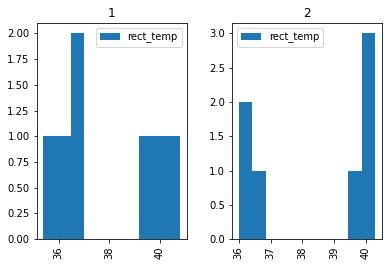

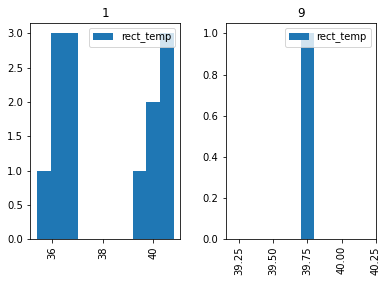

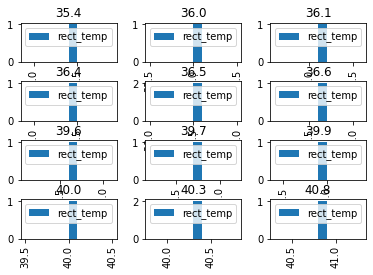

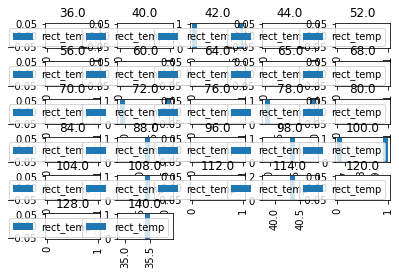

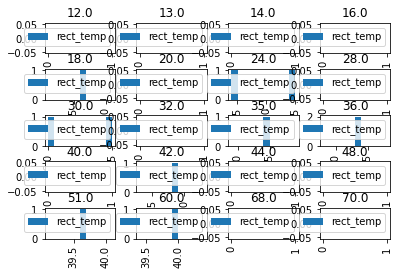

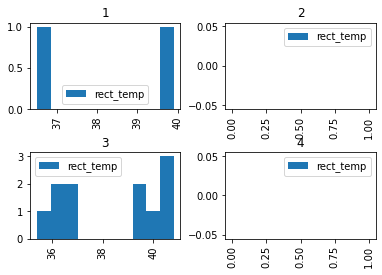

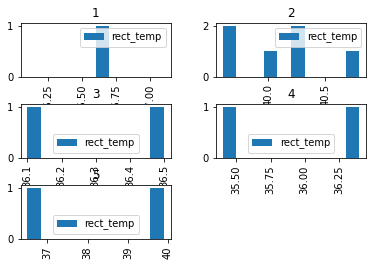

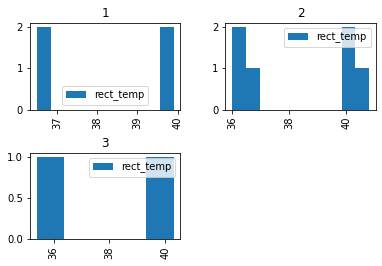

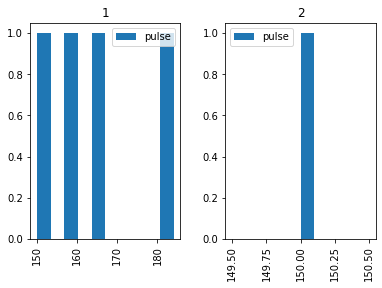

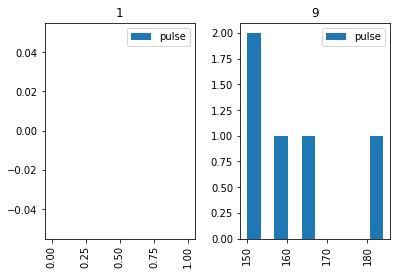

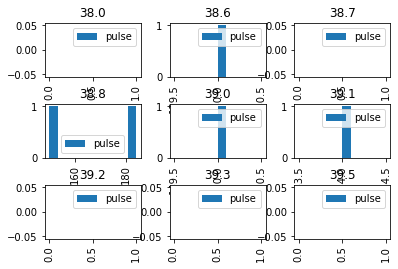

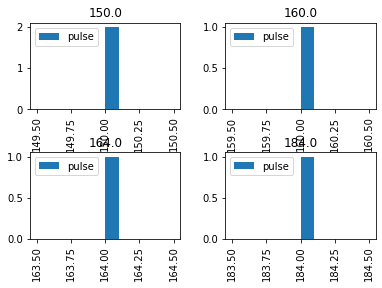

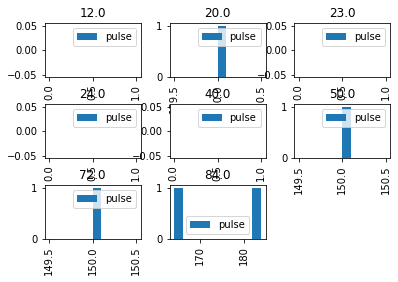

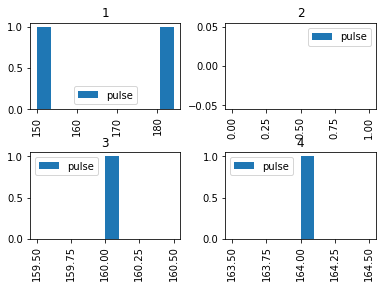

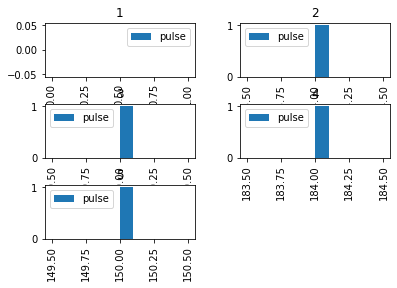

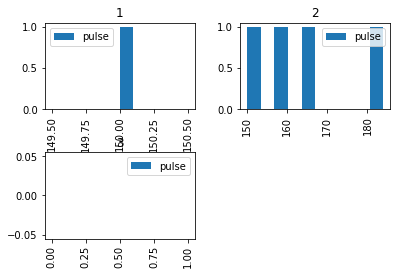

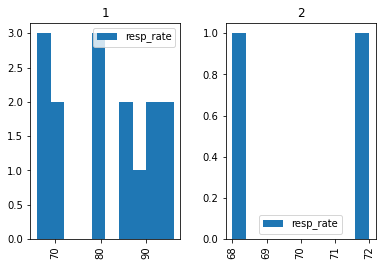

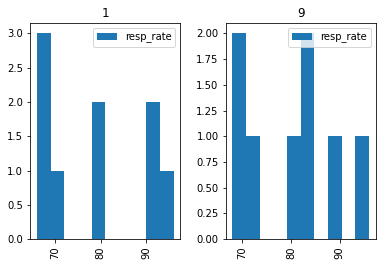

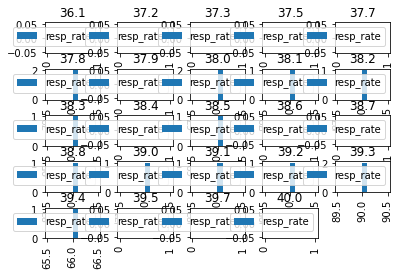

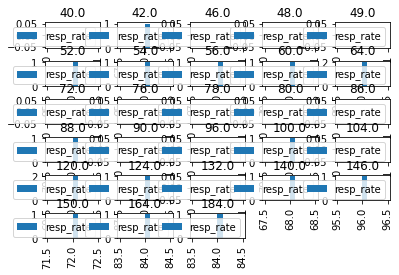

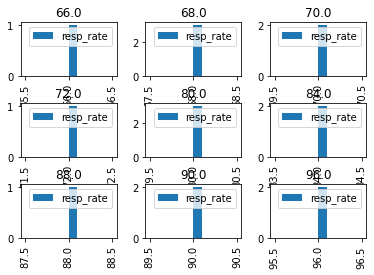

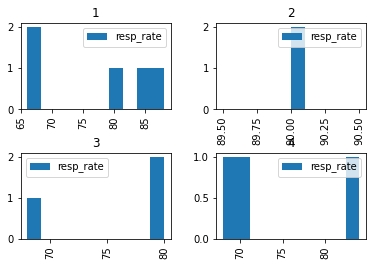

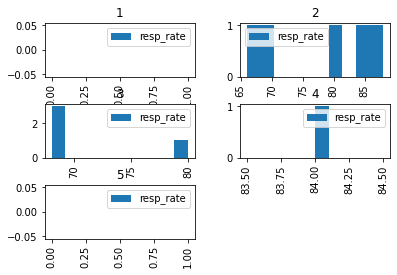

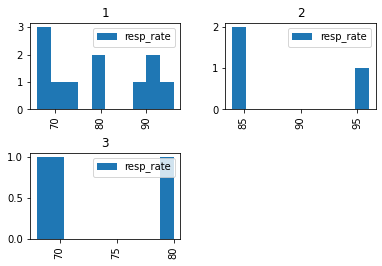

In [19]:

for col in ['rect_temp','pulse','resp_rate'] :
    lb, ub = bounds(df[col])
    print(col)
    out_bounds = df[ ~df[col].between(   # берутся значения ВНЕ диапазона
                      lb,    # от нижней границы
                      ub,    # до верхней границы
                      # inclusive=True  # включительно
                      ) ].sort_values(col)
                 
    [out_bounds.hist(col,by=col2, legend=True) for col2 in out_bounds.columns]
    print(out_bounds[ out_bounds[col].notna() ])#[ out_bounds[col] is np.NaN ]) 


Рассмотрев выбросы числовых параметров как отдельные группы данных, можно сделать следующие выводы:
- т.к. распределение значений температурного параметра равномерно относительно других параметров и различия с основной группой невелики, то, видимо, это реальные значения и их можно учитывать в исследовании
- распределение особо высоких значений пульса явно тяготеет к молодым животным со вздутием живота, большинство из которых в итоге умерло; вместе с тем нормальный характер распределения основной группы значений и небольшое количество высоких, непосредственно примыкающих к основной, позволяет считать эту группу "хвостом" основной и учитывать в исследовании
- особо высокие значения содержания красных клеток в крови встречались только у взрослых с отсутствующей перистальтикой и вздутием живота, погибшие или усыпленные в итоге; вместе с тем нормальный характер распределения основной группы значений и небольшое количество высоких, непосредственно примыкающих к основной, позволяет считать эту группу "хвостом" основной и учитывать в исследовании

### Пропуски

In [20]:
print('всего строк с пропусками: ',df[ df.count(1) < 8 ]['age'].count())    # только неполные строки (с хотя бы одним пропуском)


всего строк с пропусками:  146


In [21]:
# рассмотрим крайне неинформативные строки
col_quant = len(df.columns)   # кол-во столбцов
miss = 3        # минимальное кол-во пропусков данных в строке
print(df[ df.count(1) < (col_quant-miss+1) ]['age'].count())
print(df[ df.count(1) < (col_quant-miss+1) ])


22
    surgery age  rect_temp  pulse  resp_rate ext_temp pain out
5         2   1        NaN    NaN        NaN        2    2   1
7         1   1        NaN   60.0        NaN        3  NaN   2
28        1   1        NaN    NaN        NaN      NaN  NaN   2
52        2   1        NaN    NaN        NaN        1    1   1
56        1   1        NaN    NaN        NaN      NaN  NaN   1
72        1   1       37.7   56.0        NaN      NaN  NaN   2
74        1   9        NaN    NaN        NaN      NaN  NaN   2
78        1   1        NaN    NaN        NaN        3    5   2
87        2   1        NaN   40.0       16.0      NaN  NaN   3
93        2   1        NaN    NaN        NaN        3    5   2
96        2   1        NaN   84.0       36.0      NaN  NaN   1
129       1   1       38.4   49.0        NaN      NaN  NaN   1
136       1   1        NaN    NaN        NaN        3    5   2
152       1   1        NaN  100.0        NaN        3  NaN   1
160       1   1        NaN    NaN        NaN      Na

In [22]:
# действительно очень мало данных, особенно актуальных для рассматриваемых заболеваний
# стоит удалить такие строки из анализа
df = df.dropna(thresh = (col_quant-miss+1) )   # пропуск строки, в которой меньше N значений
df

,surgery,age,rect_temp,pulse,resp_rate,ext_temp,pain,out
0,2,1,38.5,66.0,28.0,3,5,2
1,1,1,39.2,88.0,20.0,NaN,3,3
2,2,1,38.3,40.0,24.0,1,3,1
3,1,9,39.1,164.0,84.0,4,2,2
4,2,1,37.3,104.0,35.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...
295,1,1,NaN,120.0,70.0,4,2,3
296,2,1,37.2,72.0,24.0,3,4,3
297,1,1,37.5,72.0,30.0,4,4,2
298,1,1,36.5,100.0,24.0,3,3,1


In [23]:
df.isna().mean()

surgery      0.003597
age          0.000000
rect_temp    0.143885
pulse        0.032374
resp_rate    0.136691
ext_temp     0.151079
pain         0.143885
out          0.003597
dtype: float64

In [24]:
df.isna().sum()

surgery       1
age           0
rect_temp    40
pulse         9
resp_rate    38
ext_temp     42
pain         40
out           1
dtype: int64

In [25]:
# создаем вспомогательные столбцы для оценки характеров пропусков в данных
df['surg_na'] = df['surgery']  .notna().astype(int) 
df['age_na']  = df['age']      .notna().astype(int) 
df['temp_na'] = df['rect_temp'].notna().astype(int) 
df['pulse_na']= df['pulse']    .notna().astype(int) 
df['resp_na'] = df['resp_rate'].notna().astype(int) 
df['ext_na']  = df['ext_temp'] .notna().astype(int) 
df['pain_na'] = df['pain']     .notna().astype(int) 
df['out_na']  = df['out']      .notna().astype(int) 

# df.loc[295,'rect_temp'] is np.NaN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [26]:
df

,surgery,age,rect_temp,pulse,resp_rate,ext_temp,pain,out,surg_na,age_na,temp_na,pulse_na,resp_na,ext_na,pain_na,out_na
0,2,1,38.5,66.0,28.0,3,5,2,1,1,1,1,1,1,1,1
1,1,1,39.2,88.0,20.0,NaN,3,3,1,1,1,1,1,0,1,1
2,2,1,38.3,40.0,24.0,1,3,1,1,1,1,1,1,1,1,1
3,1,9,39.1,164.0,84.0,4,2,2,1,1,1,1,1,1,1,1
4,2,1,37.3,104.0,35.0,NaN,NaN,2,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,NaN,120.0,70.0,4,2,3,1,1,0,1,1,1,1,1
296,2,1,37.2,72.0,24.0,3,4,3,1,1,1,1,1,1,1,1
297,1,1,37.5,72.0,30.0,4,4,2,1,1,1,1,1,1,1,1
298,1,1,36.5,100.0,24.0,3,3,1,1,1,1,1,1,1,1,1


In [27]:
df_copy = df.copy()

In [28]:
# проверяем на корреляцию данные в столбцах
for col1 in list(df.columns) :
    print('-----------------')
    print(1,col1)
    for col2 in df.columns.drop(col1) :
        print(2,col2)
        print( df[[col1,col2]].corr() )


-----------------
1 surgery
2 age
Empty DataFrame
Columns: []
Index: []
2 rect_temp
           rect_temp
rect_temp        1.0
2 pulse
       pulse
pulse    1.0
2 resp_rate
           resp_rate
resp_rate        1.0
2 ext_temp
Empty DataFrame
Columns: []
Index: []
2 pain
Empty DataFrame
Columns: []
Index: []
2 out
Empty DataFrame
Columns: []
Index: []
2 surg_na
         surg_na
surg_na      1.0
2 age_na
        age_na
age_na     NaN
2 temp_na
         temp_na
temp_na      1.0
2 pulse_na
          pulse_na
pulse_na       1.0
2 resp_na
         resp_na
resp_na      1.0
2 ext_na
        ext_na
ext_na     1.0
2 pain_na
         pain_na
pain_na      1.0
2 out_na
        out_na
out_na     1.0
-----------------
1 age
2 surgery
Empty DataFrame
Columns: []
Index: []
2 rect_temp
           rect_temp
rect_temp        1.0
2 pulse
       pulse
pulse    1.0
2 resp_rate
           resp_rate
resp_rate        1.0
2 ext_temp
Empty DataFrame
Columns: []
Index: []
2 pain
Empty DataFrame
Columns: []
Index: [

видно, что показания температуры, пульса и частоты дыхания имеют небольшую корреляцию (около 0.25), а отдельно пульса и дыхания - весьма заметную (0,47). скорее всего это свидетельствует об общей напряженности организма. возможно стоило взять другие данные для исследования, отражающие более специфические аспекты состояния организма при исследуемой проблеме. рекомендую взять следующий набор данных:

```
 0   surgery        299 non-null    object 
 1   age            300 non-null    object 
 2   rect_temp      240 non-null    float64
 3   pulse          276 non-null    float64
 4   perist         256 non-null    object  - перистальтика кишечника
 5   abd_dist       244 non-null    object  - растяжение живота
 6   pack_cell_vol  271 non-null    float64 - содержание красных клеток в крови
 7   out            299 non-null    object 

```

этот набор
- более полный,
- больше соответствует специфике заболевания
- и не содержит данных с субъективным характером оценки

к тому же, показатель "abdominal distension" помечен составителями как "An IMPORTANT parameter"


In [29]:
# # проверяем зависимость пропусков в показаниях температуры от других данных
# [df.hist(col, by='temp_na', legend=True) for col in df.columns]
# # зависимости не видно - видимо пропуски случайны


зависимости не видно - видимо пропуски случайны.
поскольку пропусков довольно много (14%), исключать строки с ними из анализа не стоит.
распределение плотности значений температуры близко к нормальному, поэтому
стоит заменить пропуски на одну из мер средних тенденций, например медиану

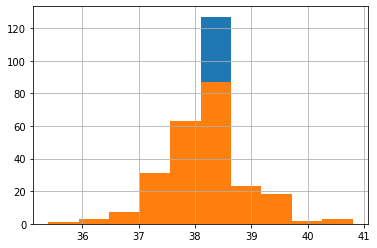

In [30]:
# оценим как повлияет замена пропусков на медианное значение
# df_fill = df.copy()
# df_fill['rect_temp'].hist()
df_copy['rect_temp'] = df['rect_temp'].fillna(df['rect_temp'].median())
df_copy['rect_temp'].hist()
df['rect_temp'].hist()


In [31]:
# pd.show_versions()

In [32]:

# # проверяем зависимость пропусков в показаниях пульса от других данных
# [df.hist(col,by='pulse_na', legend=True) for col in df.columns]
# # зависимости не видно - видимо пропуски случайны

In [33]:
a,b = list(df.groupby(['pulse_na','temp_na']).count()['age'][0:2])
a = a / (a + b)
a

0.3333333333333333

зависимости пропусков от данных не видно - видимо пропуски случайны. единственное, что стоит отметить: если пропущены данные пульса - часто (54%) пропущены и данные температуры. 

пропусков довольно немного (меньше 5%) и, учитывая небольшую "корреляцию" с пропусками по температуре, стоит рассмотреть исключение данных строк из анализа.

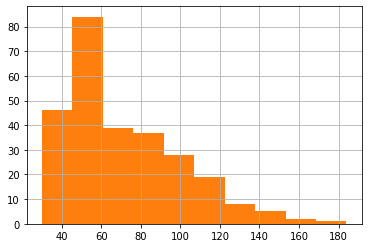

In [34]:
# рассмотрим исключение строк с пропусками пульса из анализа
# df_drop = df.copy()
# df_fill['rect_temp'].hist()
df_copy = df_copy.dropna(subset=['pulse'])
df_copy['pulse'].hist()
df['pulse'].hist()


In [35]:
# df_copy#[df_copy['surgery'].isna()]

[array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e1b7e450>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e1ac85d0>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e1a03210>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e1954350>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e189c210>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e2cd8650>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e2b71690>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e3f17410>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e253a350>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e4aea910>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesS

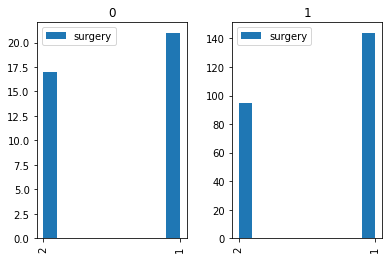

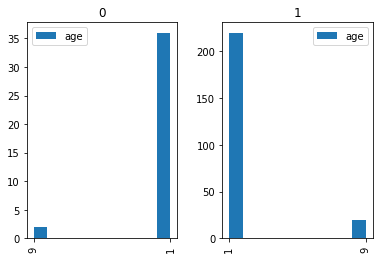

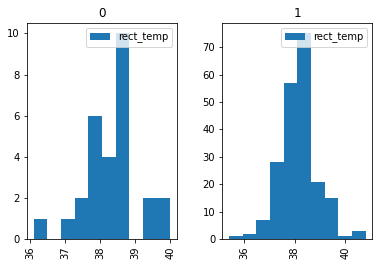

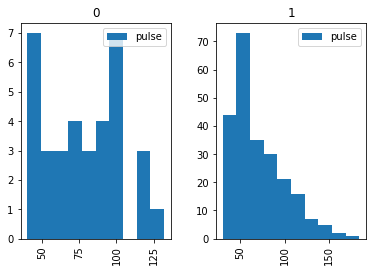

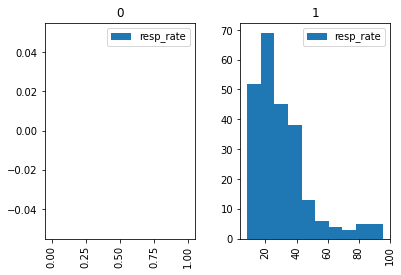

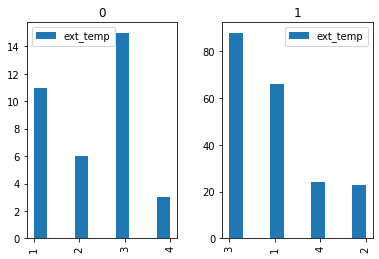

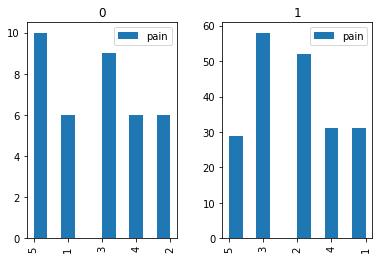

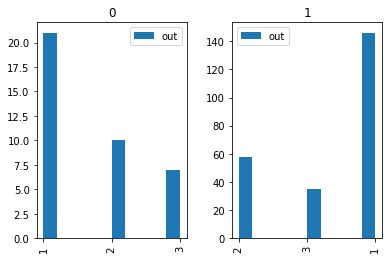

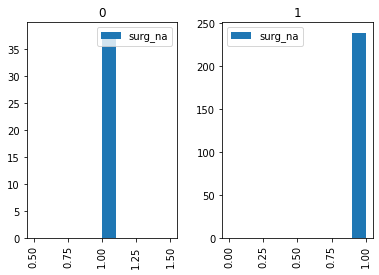

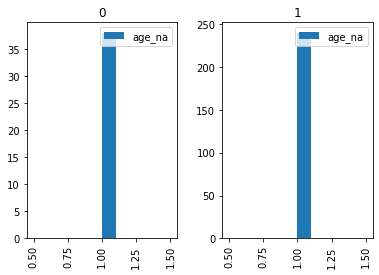

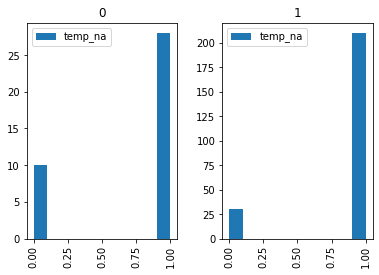

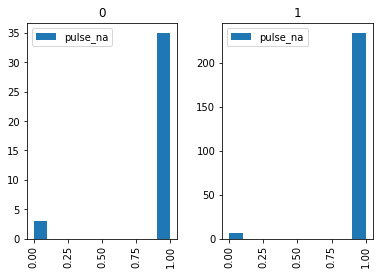

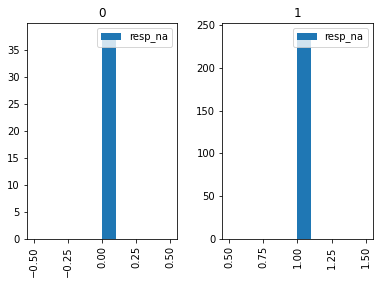

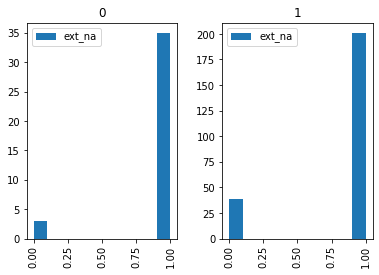

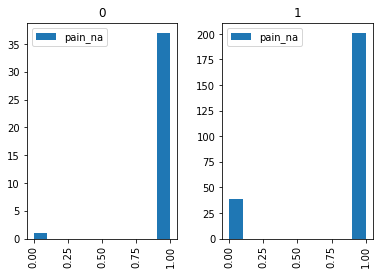

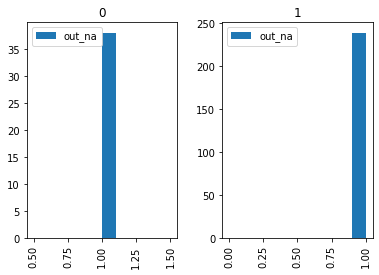

In [36]:

# проверяем зависимость пропусков в показаниях дыхания от других данных
[df.hist(col,by='resp_na', legend=True) for col in df.columns]
# зависимости не видно - видимо пропуски случайны

явной зависимости не видно - видимо пропуски случайны. единственное, что несколько выделяется - в случаях с пропусками по дыханию - выше частота "продолжительных сильных болей", но это может быть связано со случайным распределением в малой выборке.
поскольку пропусков довольно много (14%), исключать строки с ними из анализа не стоит.
распределение плотности значений дыхания близко к нормальному, поэтому
стоит заменить пропуски на одну из мер средних тенденций, например медиану

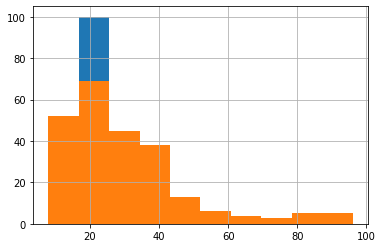

In [37]:
# оценим как повлияет замена пропусков на медианное значение
# df_fill = df.copy()
df_copy['resp_rate'] = df['resp_rate'].fillna(df['resp_rate'].median())
df_copy['resp_rate'].hist()
df['resp_rate'].hist()


In [38]:

# # проверяем зависимость пропусков в данных об оперативном вмешательстве от других данных
# print(df[ df['surgery'].isna() ])
# [df.hist(col,by='surg_na', legend=True) for col in df.columns]


In [39]:

# # проверяем зависимость пропусков в данных об итоге лечения от других данных
# print(df[ df['out'].isna() ])
# [df.hist(col,by='out_na', legend=True) for col in df.columns]


оценить зависимость пропусков по одной строке невозможно. однако, стоит отметить: вместе с данными об операции пропущены и данные об исходе лечения, и для обоих показателей - это единственный случай. к тому же, остальные показатели этого случая характерны для большинства других случаев. поэтому стоит рассмотреть исключение данной строки из анализа.

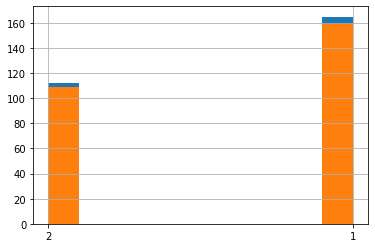

In [40]:
# рассмотрим исключение строки с пропусками итога и операции из анализа
# df_drop = df.copy()
df['surgery'].hist()
df_copy = df_copy.dropna(subset=['surgery'])
df_copy['surgery'].hist()


    surgery age  rect_temp  pulse  resp_rate ext_temp pain out  surg_na  \
1         1   1       39.2   88.0       20.0      NaN    3   3        1   
4         2   1       37.3  104.0       35.0      NaN  NaN   2        1   
17        2   1       37.5   48.0       24.0      NaN  NaN   1        1   
23        1   9       38.3  130.0       60.0      NaN    2   1        1   
25        2   1       37.8   60.0       42.0      NaN  NaN   1        1   
36        2   1       38.3  112.0       16.0      NaN  NaN   3        1   
37        1   1       37.8   72.0        NaN      NaN    5   1        1   
39        1   9       39.2  146.0       96.0      NaN  NaN   2        1   
41        2   9       39.0  150.0       72.0      NaN  NaN   1        1   
53        2   1       38.6   40.0       20.0      NaN  NaN   1        1   
81        1   1       37.3   40.0        NaN      NaN    2   1        1   
90        2   1       38.0   52.0       16.0      NaN    2   1        1   
95        1   1       37.

[array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e349ccd0>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e3187d10>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e29908d0>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e2a3c350>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e283cf50>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e3fd2cd0>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e3fe7210>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e60c5490>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e6d09fd0>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e2491d10>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesS

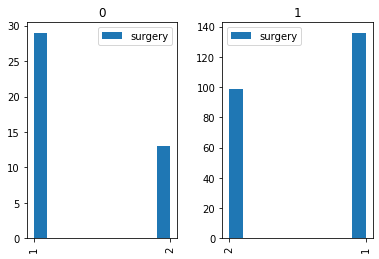

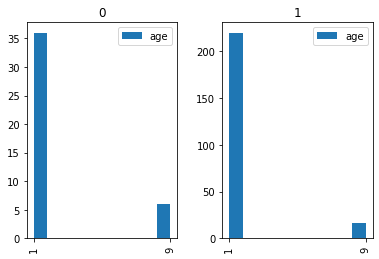

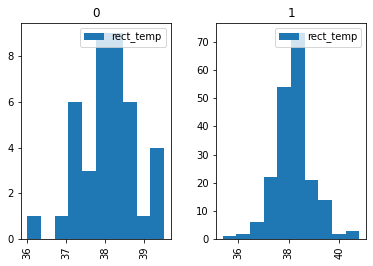

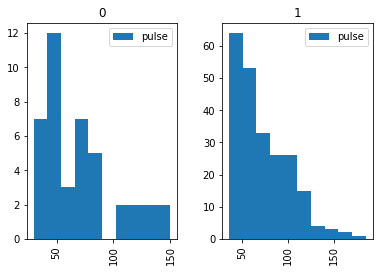

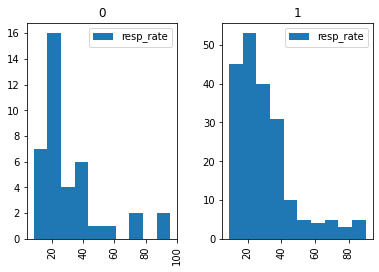

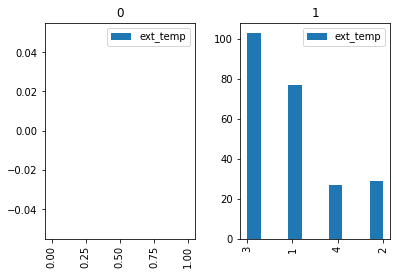

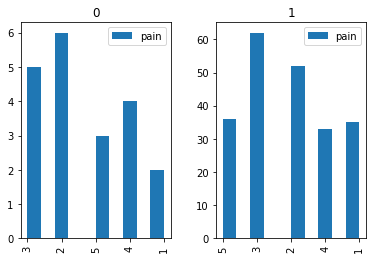

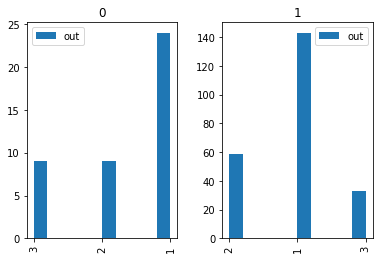

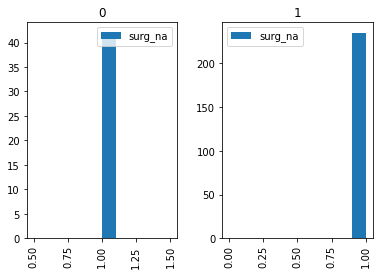

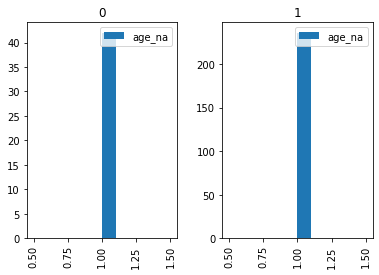

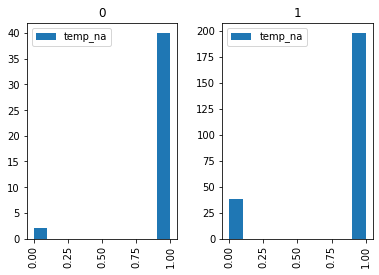

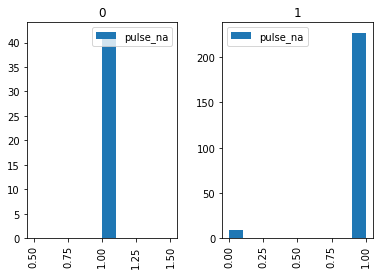

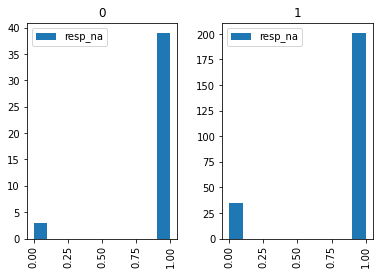

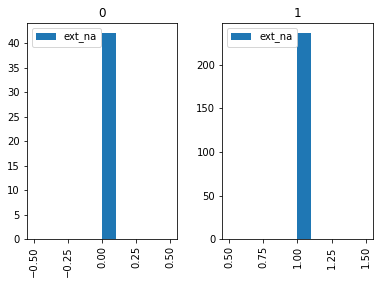

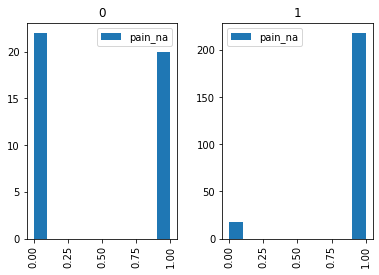

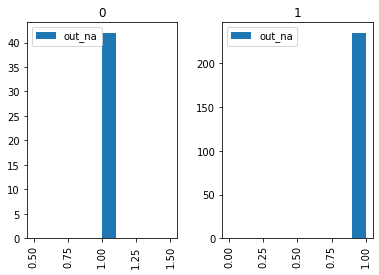

In [41]:

# проверяем зависимость пропусков в данных о перистальтике от других данных
print(df[ df['ext_temp'].isna() ])
[df.hist(col,by='ext_na', legend=True) for col in df.columns]


    surgery age  rect_temp  pulse  resp_rate ext_temp pain out  surg_na  \
4         2   1       37.3  104.0       35.0      NaN  NaN   2        1   
17        2   1       37.5   48.0       24.0      NaN  NaN   1        1   
19        2   1       39.4  110.0       35.0        4  NaN   1        1   
24        1   1       38.1   60.0       12.0        3  NaN   1        1   
25        2   1       37.8   60.0       42.0      NaN  NaN   1        1   
27        1   1       37.8   48.0       12.0        3  NaN   1        1   
36        2   1       38.3  112.0       16.0      NaN  NaN   3        1   
39        1   9       39.2  146.0       96.0      NaN  NaN   2        1   
41        2   9       39.0  150.0       72.0      NaN  NaN   1        1   
53        2   1       38.6   40.0       20.0      NaN  NaN   1        1   
68        2   1        NaN   52.0       16.0        1  NaN   1        1   
94        2   1       37.5   48.0       30.0        4  NaN   1        1   
106       1   1       38.

[array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e6930c90>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e4051d90>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e3f57d50>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e66da150>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e621ce10>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e4a7de90>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e4a66b10>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e41519d0>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e592e9d0>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e4e37890>,
       dtype=object),
 array([<matplotlib.axes._subplots.AxesS

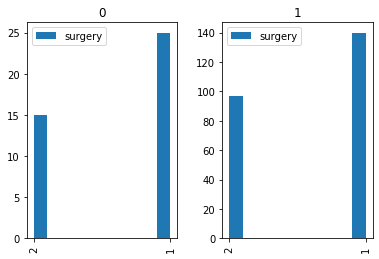

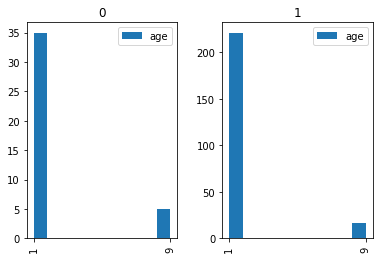

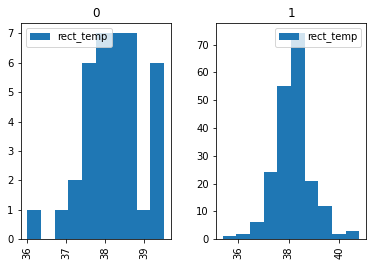

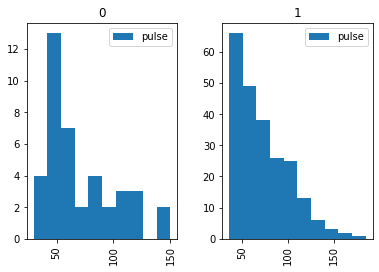

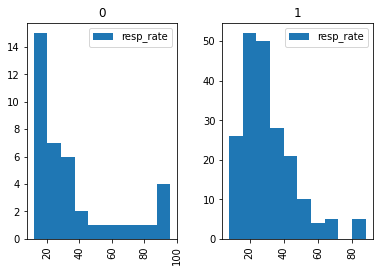

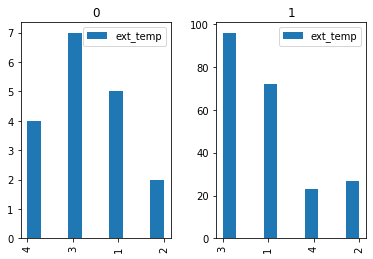

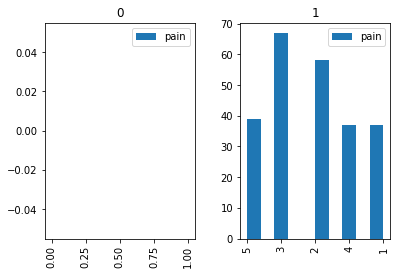

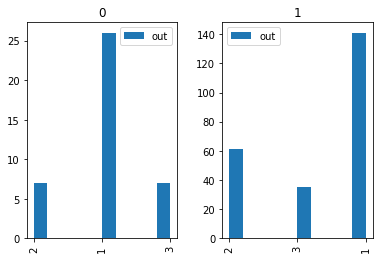

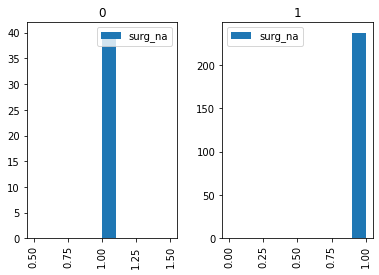

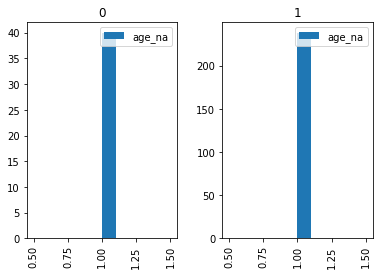

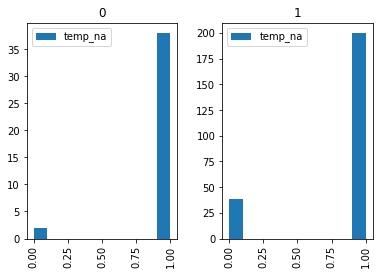

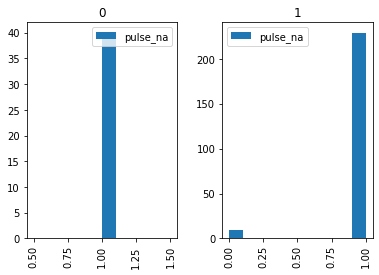

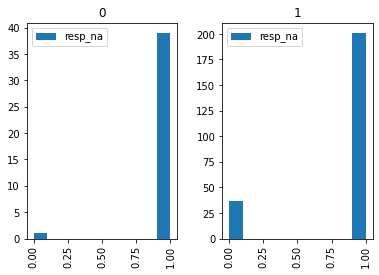

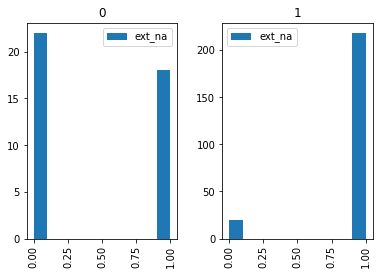

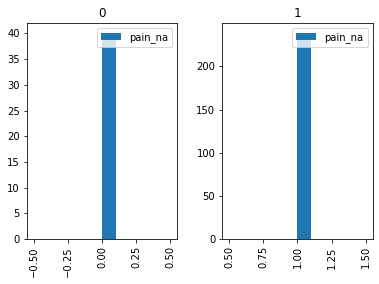

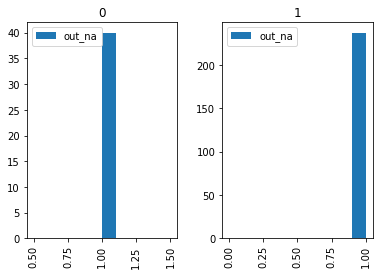

In [42]:

# проверяем зависимость пропусков в данных о вздутии от других данных
print(df[ df['pain'].isna() ])
[df.hist(col,by='pain_na', legend=True) for col in df.columns]


In [43]:
df.groupby(['ext_na','pain_na']).count()['age']
# столбец "возраст" - без собственных пропусков
# можно использовать для подсчета количества

ext_na  pain_na
0       0           22
        1           20
1       0           18
        1          218
Name: age, dtype: int64

In [44]:
a,b = list(df.groupby(['ext_na','pain_na']).count()['age'][0:2])
a = a / (a + b)
a

0.5238095238095238

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e4affe50>,
      dtype=object)

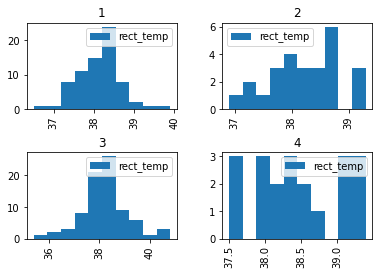

In [45]:
df.hist('rect_temp',by='ext_temp', legend=True)

зависимости пропусков от данных не видно - видимо пропуски случайны. однако, стоит отметить: если пропущены данные о температуре конечностей - часто (52%) пропущены и данные о боли. 

учитывая "корреляцию" с пропусками по вздутию, стоит рассмотреть исключение данных строк из анализа. но пропусков довольно много (15% и 14%), и остальные параметры принимают далеко не только модальные значения и их потеря может сильно повлиять на статистические показатели. субъективный показатель температуры конечностей должен коррелировать с шоковым состоянием (если холодные), что в принципе характерно для больного животного, и высокой ректальной температурой (если горячие), что несколько двусмысленно. а показатель боли мало того, что субъективен, но также может не отражать реального состояния, если до регистрации были использованы болеутоляющие.

поэтому не будем принимать компромисов, а заменим пропуски модальным значением для соответствующего параметра

In [46]:
# df_copy = df_copy.dropna(subset=['perist','abd_dist'], thresh=1)# df_copy['perist'].isna() & df_copy['abd_dist'].isna() )
# # df_copy.isna().sum()
# df_copy[ df_copy['perist'].isna() | df_copy['abd_dist'].isna() ]

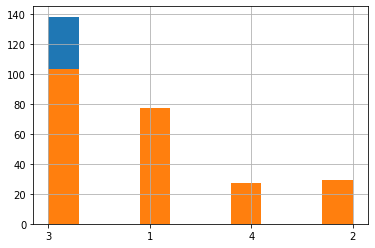

In [47]:
# оценим как повлияет замена пропусков на модальное значение
# df_fill = df.copy()
df_copy['ext_temp'] = df_copy['ext_temp'].fillna(df['ext_temp'].mode()[0])
df_copy['ext_temp'].hist()
df['ext_temp'].hist()

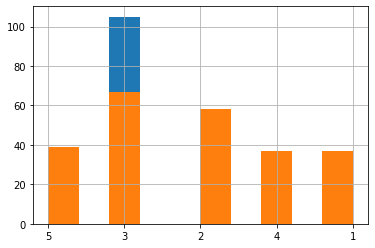

In [48]:
# оценим как повлияет замена пропусков на модальное значение
# df_fill = df.copy()
df_copy['pain'] = df_copy['pain'].fillna(df['pain'].mode()[0])
df_copy['pain'].hist()
df['pain'].hist()

### Итог

In [49]:
df_copy.isna().sum()

surgery      0
age          0
rect_temp    0
pulse        0
resp_rate    0
ext_temp     0
pain         0
out          0
surg_na      0
age_na       0
temp_na      0
pulse_na     0
resp_na      0
ext_na       0
pain_na      0
out_na       0
dtype: int64

In [53]:
df_out = df_copy.drop(['surg_na','age_na','temp_na','pulse_na','resp_na','ext_na','pain_na','out_na'], axis=1).reset_index(drop=True)
# df_out


In [54]:
df_out

,surgery,age,rect_temp,pulse,resp_rate,ext_temp,pain,out
0,2,1,38.5,66.0,28.0,3,5,2
1,1,1,39.2,88.0,20.0,3,3,3
2,2,1,38.3,40.0,24.0,1,3,1
3,1,9,39.1,164.0,84.0,4,2,2
4,2,1,37.3,104.0,35.0,3,3,2
...,...,...,...,...,...,...,...,...
263,1,1,38.2,120.0,70.0,4,2,3
264,2,1,37.2,72.0,24.0,3,4,3
265,1,1,37.5,72.0,30.0,4,4,2
266,1,1,36.5,100.0,24.0,3,3,1


Обработали данные и получили таблицу без пропусков, пригодную для оценки и расчетов различных сложных статистических показателей и построения и проверки гипотез.

In [52]:
я
df


NameError: ignored

# Теория. Основы статистики.

In [ ]:
# стандартное отклонение, среднеквадратичное откл
df[''].std()
np.std(df[''],
       ddof=1   # дельта степеней свободы (в np по умолчанию = 0)
       ) 

In [ ]:
# дисперсия
df[''].var()
np.var(df[''],
       ddof=1   # дельта степеней свободы (в np по умолчанию = 0)
       )

In [ ]:
# квантили, перцентили, процентили

df[''].quantile() # без аргумента выдаст медиану (50% - средний квартиль)
df[''].quantile(0.33)   # произвольный процентиль
df[''].quantile([0.25, 0.75])   # список процентилей (в данном случае нижний и верхний квартили)

# межквартильный размах = между верхним и нижним квартилем
IQR = Q3 - Q1 = df[''].quantile(0.75) - df[''].quantile(0.25)

In [ ]:
# основные стат параметры
df.describe()

In [ ]:
# выбросы
lower_outlier = Q1 - (1.5*IQR)
higher_outlier= Q3 + (1.5*IQR)

In [ ]:
q1 = df[''].quantile(0.25)
q3 = df[''].quantile(0.75)
iqr= q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

remove_outliers = df[ df[''].between(   # берутся значения в диапазоне
    lower_bound,    # от нижней границы
    upper_bound,    # до верхней границы
    inclusive=True  # включительно
    ) ]
remove_outliers


In [ ]:
df[ ~df[''].between(   # берутся значения ВНЕ диапазона
    lower_bound,    # от нижней границы
    upper_bound,    # до верхней границы
    inclusive=True  # включительно
    ) ]

In [ ]:
# пропуски
df.dropna()

df.dropna(thresh=n)   # пропуск строки, в которой больше N пропусков

df.dropna(axis=1)     # пропуск столбцов с пропусками

df.drop([''], axis=1) # пропуск указанного столбца

In [ ]:
df_copy = df.copy()     # копирум таблицу для внесения изменений
df_copy[''].fillna('')  # заменяем пропуски указанной строкой
df_copy[''].isna().sum()# проверяем наличие пропусков в столбце
df_copy[''].unique()    # список уникальных значений в столбце

In [ ]:
z

In [ ]:
df.fillna(method='ffill')

In [ ]:
df.fillna(method='bfill')

In [ ]:
(df.isna().mean()*100).round(2)

In [ ]:
df_fill_mode['column1'] = df['column1'].fillna(df['column1'].mode()[0])

In [ ]:
df_fill_med['column1'] = df['column1'].fillna(df['column1'].median())